<a href="https://colab.research.google.com/github/BodhiHungerford/bodhihungerford.github.io/blob/main/Sport's_Nutrition_Analysis_Code_(Python_Capstone).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/MyDrive"

'1-10[Successful Student Qualities].gdoc'
'15.1: SQL JOIN clause intro assignment.gdoc'
'15.5 DRILLS SQL III 15.5.txt'
'23.1 .gsheet'
 abalone-data-descriptive-stats-02-14-19.xlsx
'capstone case study 1.xlsx'
'car_revenue (1).xlsx'
'Colab Notebooks'
'Copy of Job & Activity Tracker -- Click File > Make a copy....gsheet'
'Copy of Job & Activity Tracker -- Click File > Make a copy...NEW.gsheet'
'Copy of PYTHON-Basics.gdoc'
 Desc-stats-in-excel.gsheet
 Desc-stats-in-excel.xlsx
'epa-fuel-economy capstone (part-2).xlsb.xlsx'
'excel-foundations-iii-drills-start (version 1).xlsb.xlsx'
'excel-foundations-iii-drills-start world series.xlsb.xlsx'
 excel-foundations-iii-drills-start.xlsx
 excelfoundationsivcheckpoint2-01222019.xlsx
'excelfoundationsivcheckpoint6 drill.xlsx'
 excel-pivot-table-assignment.xlsx
'Getting started.pdf'
 hello_world_google_colab.ipynb
 houseprices.xlsx
'HR compensation tool'
 IMG_0133.jpg
 IMG_0134.PNG
'jupyter-import-colab (1).ipynb.txt'
'Lariat profitability plan'
'Lea

In [ ]:

import pandas as pd

df_nutr=pd.read_excel('/content/gdrive/MyDrive/products_w_ing3.xlsx')



**Lets look at the data collected about sport nutrion supplements**








In [ ]:
#print(df_nutr)

In [ ]:
#df_nutr.head(10)


In [ ]:
df_nutr.columns

Index(['Category', 'Category_abr.', 'Unique_Categories', 'Name', 'Brand',
       'Size', 'Flavor', 'Servings', 'Rating', 'FlavorRating',
       ...
       'LICORICE (GLYCYRRHIZA GLABRA) (ROOT)',
       'GINGER (ZINGIBER OFFICINALE) (ROOT)',
       '5-HTP (5-HYDROXYTRYPTOPHAN) (GRIFFONIA SIMPLICIFOLIA) (SEED)',
       'CALCIUM (AS CALCIUM CARBONATE AND CALCIUM CITRATE)',
       'MAGNESIUM (AS MAGNESIUM OXIDE AND MAGNESIUM CITRATE)',
       'ST JOHNS WORT EXTRACT (0.3% HYPERICIN)(FLOWER)',
       'SOY ISOFLAVONES (5% TOTAL ISOFLAVONES)',
       'BLACK COHOSH EXTRACT (2.5% TRITERPENOID SAPONINS)(RHIZOME)',
       'RED CLOVER POWDER (AERIAL)', 'CHASTE TREE EXTRACT (10:1)(FRUIT)'],
      dtype='object', length=2839)

**As you can see there are lots of columns, this capstone is exploring three: "Category", "Price", "Rating"**




In [ ]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats import weightstats as stests
import seaborn as sns
import matplotlib.pyplot as plt
import math
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Sports Nutrition is a field where consumers are very knowledgeable. We are talking about athletes mostly and people who are trying to function at there highest, we could also be talking about models, yoga instructors, soon-to-be-wives, or even babies(well probably the babies moms). Sports nutrition is wide ranging field. Why? Sports is for the most part about being physical and using your body and everyone wants to be able to move there best, look good and function at a high level. Now the issues that this data may answer can vary on where you are coming from. If you are a body builder you are looking for mass-builders and pre/postworkout, protein and specialty protein products, and bcaa supplements. If you are a mom who is trying to loss fat after a pregnancy you are probably(although I do not recommend the non-natural forms of this) looking for fat burners and models(unforutantely) are looking for appetite suppresants. If you are me, a vegetarian Jiu Jitsu(who trys to not have to much milk especially when it is not organic), you want to see if plant protein is afforable as compared to the non-vegan options. Also what do other customers think about the different protein types. So there is a lot of things to consider. Here I am just going to focus on a few. As i mentioned above the main columns we will look at is; 'Category', 'Price', 'Rating'.


What Categorys have the highest count? What Categorys have the lowest count? Which ones do you think will have the highest rating/highest price?

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 <a list of 24 Text major ticklabel objects>)

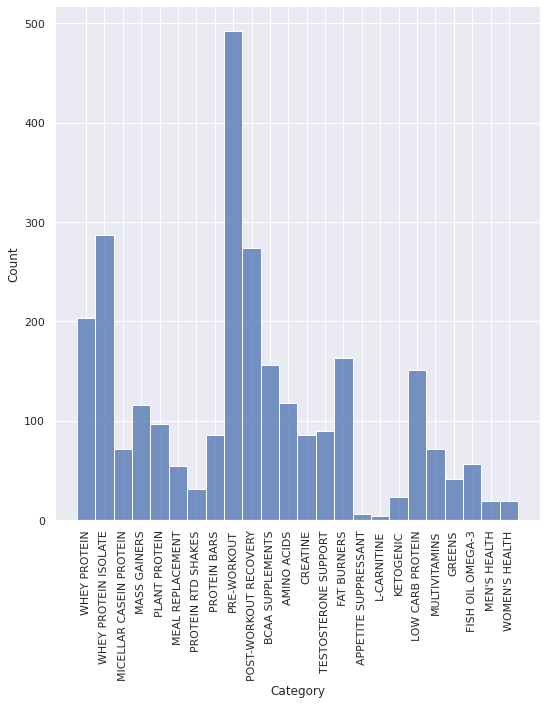

In [ ]:
ax = sns.displot(df_nutr['Category'], height=8)
plt.xticks(rotation = 90)

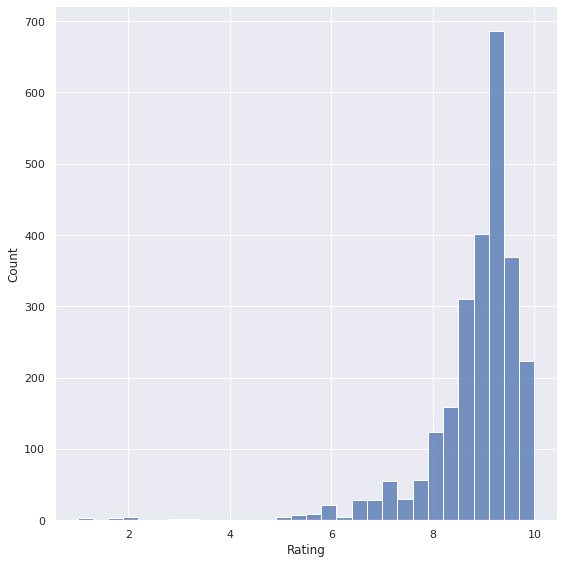

In [ ]:
ax = sns.displot(df_nutr['Rating'], bins = 30, height=8)

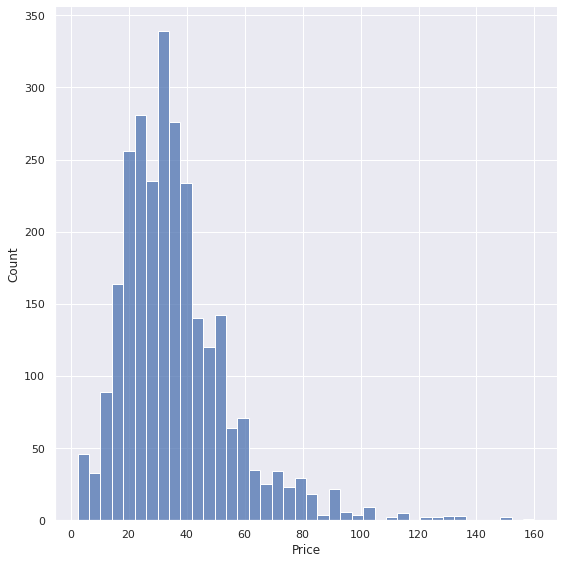

In [ ]:
ax = sns.displot(df_nutr['Price'], bins=40, height=8)



```
# This is formatted as code
```

hmmm.. It seems ratings is mostly >8.0 with the highest concentration around 9.33.
Price is mostly below 60 dollars, with the highest volumes between 20 and 40 dollars.


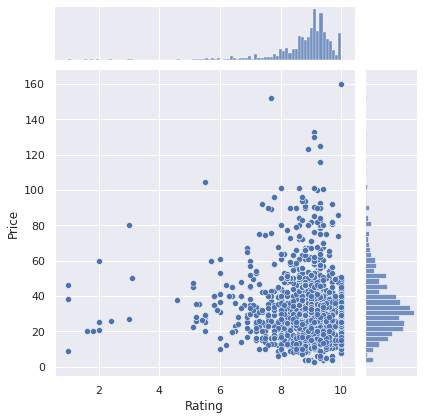

In [ ]:
sns.jointplot(x="Rating",y="Price", data=df_nutr)

My hypothesis is if Plant Protein and Whey Protein are considered comparable, then Plant Protein will be a little more expensive and a little lower rated.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

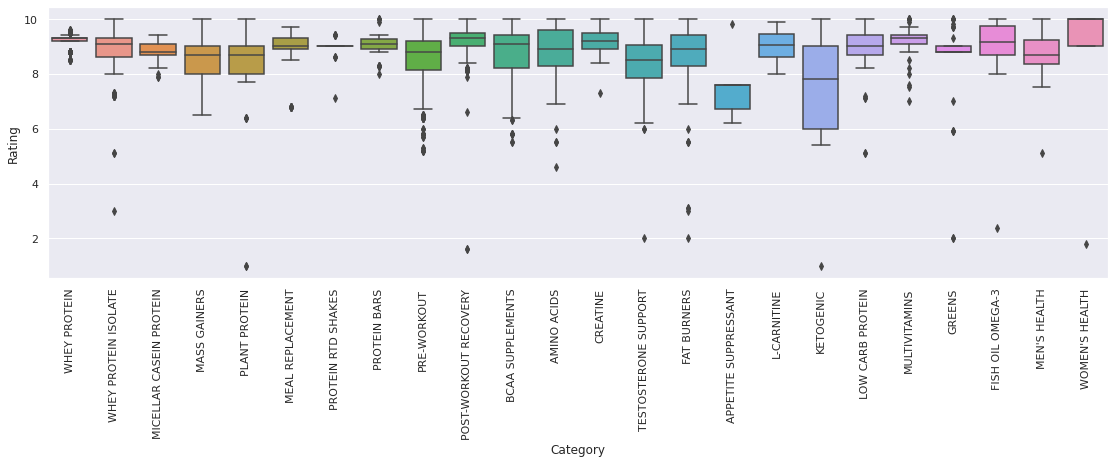

In [ ]:
plt.figure(figsize = (19,5))
sns.boxplot(y='Rating', x='Category',  data=df_nutr)
plt.xticks(rotation = 90)

So above we see as shown before, the ratings are generally high for all the supplements. So is there any other things that we can gather from the data? The "ketogenic" bar seems to be the largest, while "whey protein" bar is small. Is there anything else we can gather from the data?

(explore: highest ceiling/lowest floor      ,      outliers)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

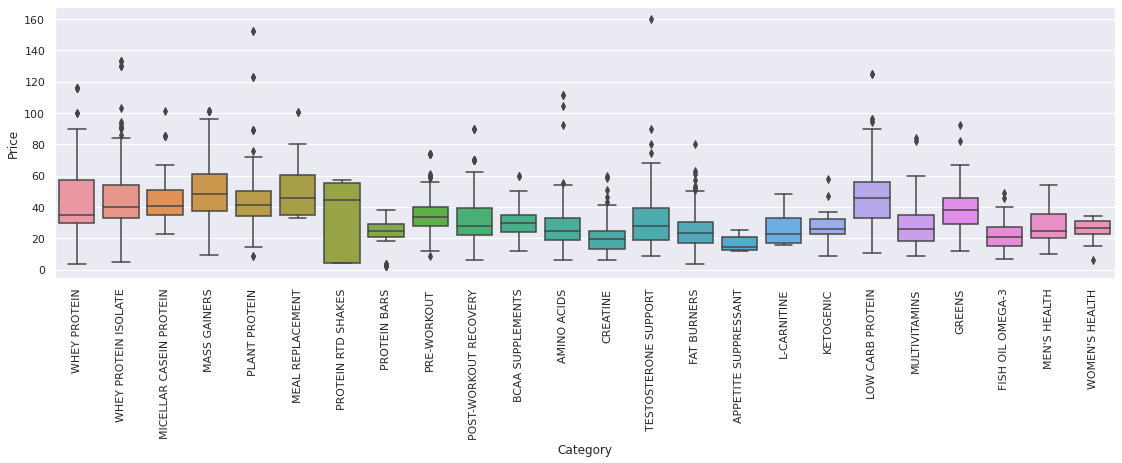

In [ ]:
plt.figure(figsize = (19,5))
sns.boxplot(y='Price', x='Category', data=df_nutr)
plt.xticks(rotation = 90)

Same chart, but the bars are lower, why?
Why do some bars have a large median while others are very condensed?
What something more specific you would like to know about the chart?
(plant protein)



```
# This is formatted as code
```





(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text major ticklabel objects>)

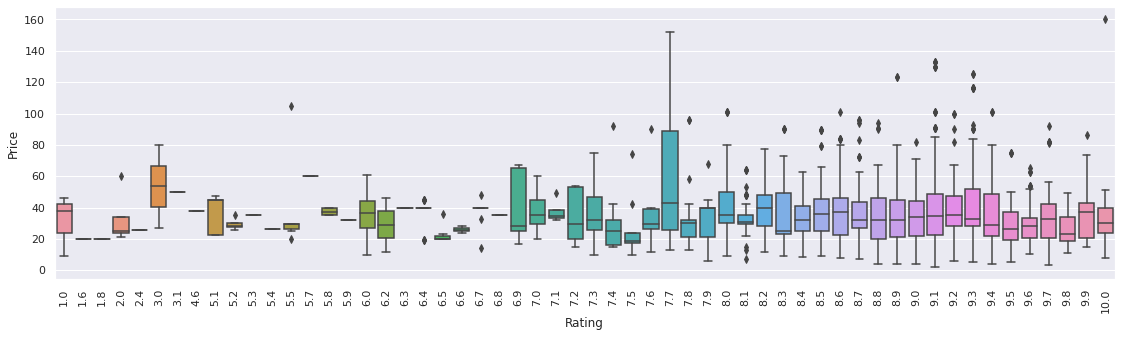

In [ ]:
plt.figure(figsize = (19,5))
sns.boxplot(y='Price', x='Rating', data=df_nutr)
plt.xticks(rotation = 90)


In [ ]:
df_nutr.fillna(df_nutr.mean(), inplace=True)

In [ ]:
df_nutr[['WHEY PROTEIN', 'PLANT PROTEIN']].describe()

KeyError: ignored

What are we looking at here?     mean, std, max, min and percentiles, also the count of each column. How is this useful? 'Ratings' paramaters are obviously way smaller and limited, while Price much larger variance and not limited. Comparing correlation, we see there is no significant correlation between the Rating and Price.

In [ ]:
df_nutr[['Category', 'Rating', 'Price']].corr()

,Rating,Price
Rating,1.00000,-0.01748
Price,-0.01748,1.00000


Below we have the pearsonr test.

In [ ]:
stats.pearsonr(df_nutr['Rating'], df_nutr['Price'])

(-0.01747954115238721, 0.3622404561198486)

The first value indicates the correlation. The closer to 0 to lesser the correlation. the second value is the p-value. The p-value indicates the confidence level in a margin of difference for the data. Any number <.05 is considered too close to compare as different. Numbers above that make the data more and more contrasting.

In [ ]:
PlntPrtn = df_nutr.iloc[(df_nutr['Category'] == "PLANT PROTEIN").values]
PlntPrtn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 678 to 774
Columns: 2839 entries, Category to CHASTE TREE EXTRACT (10:1)(FRUIT)
dtypes: float64(85), int64(585), object(2169)
memory usage: 2.1+ MB


In [ ]:
WheyPrtn = df_nutr.iloc[(df_nutr['Category'] == "WHEY PROTEIN").values]
WheyPrtn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 202
Columns: 2839 entries, Category to CHASTE TREE EXTRACT (10:1)(FRUIT)
dtypes: float64(85), int64(585), object(2169)
memory usage: 4.4+ MB


In [ ]:
#ztest ,pval1 = stests.ztest(PlntPrtn['Rating'], x2=WheyPrtn['Rating'], value=0,alternative='two-sided')
#
#if pval1<0.05:
    #print("reject null hypothesis")
#else:
    #print("accept null hypothesis")


In [ ]:
PlntPrtn.fillna(PlntPrtn.mean(), inplace=True)
WheyPrtn.fillna(WheyPrtn.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
stats.ttest_ind(PlntPrtn['Price'], WheyPrtn['Price'])

Ttest_indResult(statistic=1.3539124783719416, pvalue=0.1767901799976532)

The independent t-test above is telling us first, the value of a single standard deviation for the difference between the two and secondly, the p-value which if low indicates the difference is significant and if high than the opposite. The T-statistic 1.35, between 'whey protein' and 'plant protein', is different but not significant enough to reject the null.

In [ ]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(PlntPrtn['Price'], WheyPrtn['Price'])

'The difference in means at the 95% confidence interval (two-tail) is between -10.188263385536336 and 1.9849014435322285.'

In [ ]:
stats.ttest_ind(PlntPrtn['Rating'], WheyPrtn['Rating'])

Ttest_indResult(statistic=-7.202122599503136, pvalue=4.864355377508581e-12)

In this case you can see the std is quite high for a range of only 10. This means that the p-value will likely be low and it is at .000000000004864355. That is very low. now we can go ahead and proceed with the data.

In [ ]:
get_95_ci(PlntPrtn['Rating'], WheyPrtn['Rating'])

'The difference in means at the 95% confidence interval (two-tail) is between 0.4387707726959382 and 0.9848996974083777.'

The T-test with 99% confidence that there is a difference in mean rating between plant and whey. So for the same price based on the previous experiment you can see whey protein has a significantly higher rating than plant protein.  Going back to my original hypothesis of 'Plant Protein' being a little more expensive and rated a little lower we find that my hypothesis in both cases was wrong. Plant protein is about the same price as whey but considerably less liked. Although I was wrong about my hypothesis I am not surprised so much by the ratings result. The Price i was expecting to be more expensive but as for rating plant protein is a new and not fully accepted alternative. There is plenty of bias for whey protein and its beleived better qualities. I think this is what will need to be further researched and there is a need to understand more about plant protein. For further research an existing collection/survey of consumers regarding there opinions of plant protein or protein in general is recommended .



---


